In [2]:
# Dependencies and Setup
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Read Ironore_price_market_index_test.csv File and store into Pandas data frame

iron_data_df = pd.read_csv('Outputs/iron_data.csv')
four_bed_two_bath = pd.read_csv('Outputs/four_bed_two_bath_housing.csv')

# ANALYSIS

#### All the analysis tables are from 2007-01(period format quarterly) to 2018-10. The date columns are in format 2007-01-01(datetime format) just for plotting purpose(which will not effect elsehwere) as it wouldnot let me plot in period format

### RQ1:Is there increase or decrease in commodity price(iron ore price) over the years?

In [16]:
#Storing the original iron_data in a variable
iron_filtered = iron_data_df
#As the Date column was in object type converting to datetime for plotting purpose
iron_filtered["Date"]=pd.to_datetime(iron_filtered["Date"])
iron_filtered["Date"]=iron_filtered["Date"].astype(str)
iron_filtered["Date"]=pd.to_datetime(iron_filtered["Date"])
#Selecting the iron ore data from year 2007 till 2018
irondata_filtered_df =iron_filtered[(iron_filtered['Date'] >='2007-01-01')& (iron_filtered['Date'] <='2018-10-01')]
pd.set_option('display.float_format', lambda x: '%.2f' % x)
irondata_edited = irondata_filtered_df.groupby("Date")["Iron_Price"].mean()
irondata_avgprice = pd.DataFrame({'Date':irondata_edited.index, 'Average_IronOre_Price':irondata_edited.values})
irondata_avgprice


,Date,Average_IronOre_Price
0,2007-01-01,36.63
1,2007-04-01,36.63
2,2007-07-01,36.63
3,2007-10-01,36.63
4,2008-01-01,60.80
5,2008-04-01,60.80
6,2008-07-01,60.80
7,2008-10-01,64.43
8,2009-01-01,68.57
9,2009-04-01,67.93


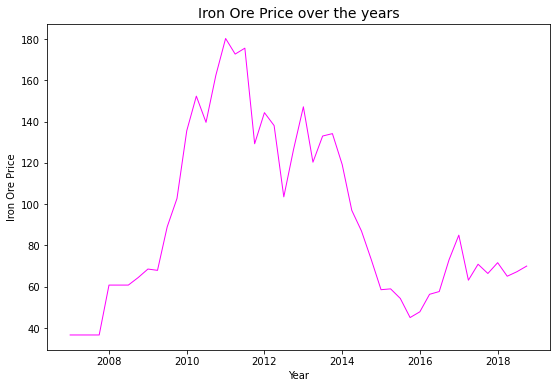

In [19]:
#Setting the x_axis and y_axis from the irondata_filtered dataframe
x_axis=irondata_avgprice["Date"]
y_axis=irondata_avgprice["Average_IronOre_Price"]

#Figure size
fig1, ax1 = plt.subplots(figsize=(9,6))

#Setting the x-labels, y-labels and title
plt.xlabel("Year")
plt.ylabel("Iron Ore Price")
plt.title("Iron Ore Price over the years", fontsize=14)

#Plotting the line
plt.plot(x_axis, y_axis, linewidth="1", color ="magenta")

#Save the fig
plt.savefig("Images/IronPrice.jpg")
plt.show()


## RQ2: Is there increase or decrease in housingprices over the years?

## RQ3: Is there coorelation between housing prices and commodity prices?

##### The house prices are unevenly distributed over the month of that year so I have averaged the house prices for each month so that our data would look uniform

### Houses with 4 Bedroom and 2 bathroom

### Perth

In [15]:
#For Perth 4 bed and 2 bathroom
#Filter as per city and then upto date required
fourbed_twobath_perth=four_bed_two_bath[four_bed_two_bath['CITY']=="Perth"]
fourbed_twobath_perthonly=fourbed_twobath_perth[fourbed_twobath_perth['Date']<"2019-06"]
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Using groupby by date to calculate average house price month wise
#Then converting series to a dataframe
perth_4bed2bath_edited = fourbed_twobath_perthonly.groupby("Date")["PRICE"].mean()
perth_4bed2bath_avgprice = pd.DataFrame({'Date':perth_4bed2bath_edited.index, 'Average_Houseprice_Perth':perth_4bed2bath_edited.values})

#As the date type is in period which cant be plotted in graph so converting to datetime
perth_4bed2bath_avgprice_final =perth_4bed2bath_avgprice
perth_4bed2bath_avgprice_final["Date"]=perth_4bed2bath_avgprice_final["Date"].astype(str)
perth_4bed2bath_avgprice_final["Date"]=pd.to_datetime(perth_4bed2bath_avgprice_final["Date"])
perth_4bed2bath_avgprice_final

,Date,Average_Houseprice_Perth
0,2007-01-01,892000.00
1,2007-04-01,869633.33
2,2007-07-01,850222.22
3,2007-10-01,848909.09
4,2008-01-01,812615.38
5,2008-04-01,724631.58
6,2008-07-01,572050.00
7,2008-10-01,661031.25
8,2009-01-01,814750.00
9,2009-04-01,637394.74


In [17]:
#For Sydney 4 bed and 2 bathroom
#Filter as per city and then upto date required
fourbed_twobath_sydney=four_bed_two_bath[four_bed_two_bath['CITY']=="Sydney"]
fourbed_twobath_sydneyonly=fourbed_twobath_sydney[fourbed_twobath_sydney['Date']<"2019-06"]
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Using groupby by date to calculate average house price month wise
#Then converting series to a dataframe
sydney_4bed2bath_edited = fourbed_twobath_sydneyonly.groupby("Date")["PRICE"].mean()
sydney_4bed2bath_avgprice = pd.DataFrame({'Date':sydney_4bed2bath_edited.index, 'Average_Houseprice_Sydney':sydney_4bed2bath_edited.values})

#As the date type is in period which cant be plotted in graph so converting to datetime
sydney_4bed2bath_avgprice_final =sydney_4bed2bath_avgprice
sydney_4bed2bath_avgprice_final["Date"]=sydney_4bed2bath_avgprice_final["Date"].astype(str)
sydney_4bed2bath_avgprice_final["Date"]=pd.to_datetime(sydney_4bed2bath_avgprice_final["Date"])
sydney_4bed2bath_avgprice_final

,Date,Average_Houseprice_Sydney
0,2007-01-01,763464.36
1,2007-04-01,1011212.96
2,2007-07-01,933351.85
3,2007-10-01,994728.07
4,2008-01-01,1062655.85
5,2008-04-01,1111551.13
6,2008-07-01,1015727.73
7,2008-10-01,914776.65
8,2009-01-01,856371.22
9,2009-04-01,931597.66


##### Combined Dataframe with iron prices and Perth/Sydney houseprice with 4 bedroom and 2 bathroom

In [18]:
#Merging the irondata, perth and sydney house prices with 4 bedroom and 2 bathroom
houses_4bed2bath_iron_combined = irondata_avgprice.merge(perth_4bed2bath_avgprice_final.merge(sydney_4bed2bath_avgprice_final, on="Date"), on="Date")
houses_4bed2bath_iron_combined

,Date,Average_IronOre_Price,Average_Houseprice_Perth,Average_Houseprice_Sydney
0,2007-01-01,36.63,892000.00,763464.36
1,2007-04-01,36.63,869633.33,1011212.96
2,2007-07-01,36.63,850222.22,933351.85
3,2007-10-01,36.63,848909.09,994728.07
4,2008-01-01,60.80,812615.38,1062655.85
5,2008-04-01,60.80,724631.58,1111551.13
6,2008-07-01,60.80,572050.00,1015727.73
7,2008-10-01,64.43,661031.25,914776.65
8,2009-01-01,68.57,814750.00,856371.22
9,2009-04-01,67.93,637394.74,931597.66


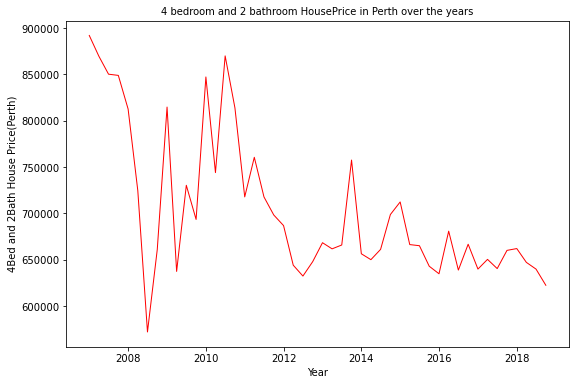

In [20]:
#Setting the x_axis and y_axis from the irondata_filtered dataframe
x_axis=houses_4bed2bath_iron_combined["Date"]
y_axis=houses_4bed2bath_iron_combined["Average_Houseprice_Perth"]

#Figure size
fig1, ax1 = plt.subplots(figsize=(9,6))

#Setting the x-labels, y-labels and title
plt.xlabel("Year")
plt.ylabel("4Bed and 2Bath House Price(Perth)")
plt.title("4 bedroom and 2 bathroom HousePrice in Perth over the years", fontsize=10)
ax1.ticklabel_format(style='plain')

#Plotting the line
plt.plot(x_axis, y_axis, linewidth="1", color ="r")

#Save the fig
plt.savefig("Images/Perth_Houseprice.jpg")
plt.show()

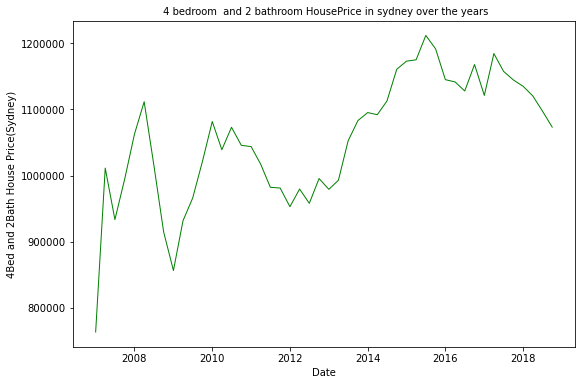

In [21]:
#Setting the x_axis and y_axis from the irondata_filtered dataframe
x_axis=houses_4bed2bath_iron_combined["Date"]
y_axis=houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"]

#Figure size
fig1, ax1 = plt.subplots(figsize=(9,6))

#Setting the x-labels, y-labels and title
plt.xlabel("Date")
plt.ylabel("4Bed and 2Bath House Price(Sydney)")
plt.title(" 4 bedroom  and 2 bathroom HousePrice in sydney over the years", fontsize=10)
ax1.ticklabel_format(style='plain')

#Plotting the line
plt.plot(x_axis, y_axis, linewidth="1", color="g")

#Save the fig
plt.savefig("Images/Sydney_houseprices.jpg")
plt.show()

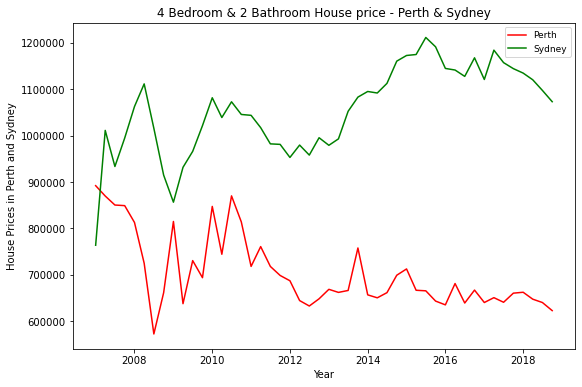

In [22]:
#Plotting to see the variation between the cities
x_values=houses_4bed2bath_iron_combined["Date"]
y_values=houses_4bed2bath_iron_combined["Average_Houseprice_Perth"]
z_values=houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"]

#Figure size
fig1, ax1 = plt.subplots(figsize=(9,6))

#Naming the x-axis, y-axis and the whole graph
plt.xlabel("Year")
plt.ylabel("House Prices in Perth and Sydney")
plt.title("4 Bedroom & 2 Bathroom House price - Perth & Sydney")
ax1.ticklabel_format(style='plain')

plt.plot(x_values, y_values, color="r", label="Perth")
plt.plot(x_values, z_values, color="g", label="Sydney")

plt.legend(fontsize=9, loc="best")

#Save the fig
plt.savefig("Images/Combined_houseprices.jpg")
plt.show()

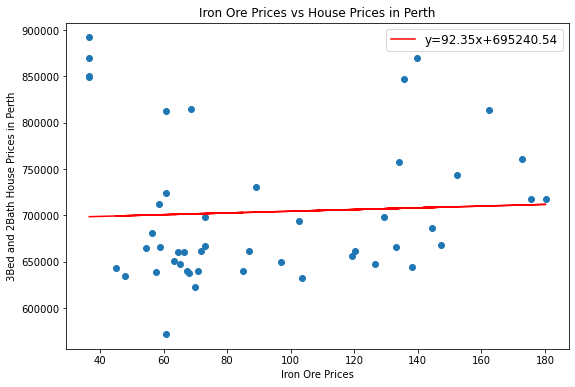

The Pearson correlation coefficient between iron prices and 4 bedroom and 2 bathroom house prices in perth is 0.05


In [43]:
#Setting the x_axis and y_axis 
x_values=houses_4bed2bath_iron_combined["Average_IronOre_Price"]
y_values=houses_4bed2bath_iron_combined["Average_Houseprice_Perth"]

fig1, ax1 = plt.subplots(figsize=(9,6))

#regression part
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq =f"y= {round(slope,2)} x + {round(intercept,2)}"

# Using scatter plot to see if they are correlated
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
ax1.ticklabel_format(style='plain')

plt.xlabel('Iron Ore Prices')
plt.ylabel('3Bed and 2Bath House Prices in Perth')
plt.title('Iron Ore Prices vs House Prices in Perth')
plt.legend(fontsize=12, loc="best")

plt.savefig("Images/Correlation_Perth.jpg")
plt.show()

#Computing the Pearson correlation coefficient
iron_price = houses_4bed2bath_iron_combined.iloc[:,1]
perth_houseprice = houses_4bed2bath_iron_combined.iloc[:,2]

correlation = st.pearsonr(iron_price,perth_houseprice)
print(f"The Pearson correlation coefficient between iron prices and 4 bedroom and 2 bathroom house prices in perth is {round(correlation[0],2)}")

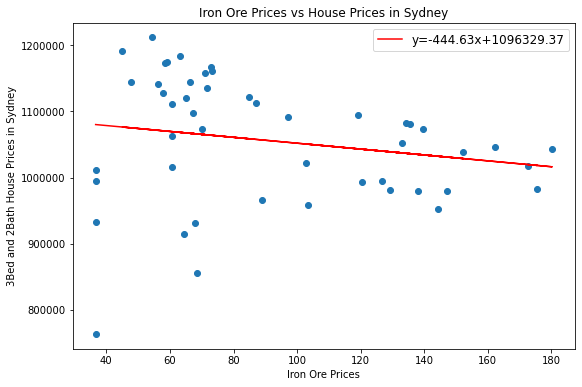

The pearson correlation coefficient between iron prices and 4 bedroom and 2 bathroom house prices in Sydney is -0.2


In [44]:
#Setting the x_axis and y_axis 
x_values=houses_4bed2bath_iron_combined["Average_IronOre_Price"]
y_values=houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"]

fig1, ax1 = plt.subplots(figsize=(9,6))

#regression part
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq =f"y= {round(slope,2)} x + {round(intercept,2)}"

# Using scatter plot to see if they are correlated
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-", label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
ax1.ticklabel_format(style='plain')

plt.xlabel('Iron Ore Prices')
plt.ylabel('3Bed and 2Bath House Prices in Sydney')
plt.title('Iron Ore Prices vs House Prices in Sydney')
plt.legend(fontsize=12, loc="best")

plt.savefig("Images/Correlation_Sydney.jpg")
plt.show()

#Computing the Pearson correlation coefficient
iron_price = houses_4bed2bath_iron_combined.iloc[:,1]
sydney_houseprice = houses_4bed2bath_iron_combined.iloc[:,3]

correlation = st.pearsonr(iron_price,sydney_houseprice)
print(f"The pearson correlation coefficient between iron prices and 4 bedroom and 2 bathroom house prices in Sydney is {round(correlation[0],2)}")

### Performing T test for Iron Prices vs Perth House prices with 4 bedroom and 2 bathroom

* Checking the assumptions related to ttest

In [27]:
#calculating the standard deviation
population1= houses_4bed2bath_iron_combined["Average_IronOre_Price"].mean()
population2_perth= houses_4bed2bath_iron_combined["Average_Houseprice_Perth"].mean()

population1_std= np.std(houses_4bed2bath_iron_combined["Average_IronOre_Price"])
population2_perth_std= np.std(houses_4bed2bath_iron_combined["Average_Houseprice_Perth"])

population1_std, population2_perth_std

(41.348106096391966, 78048.25352322994)

NormaltestResult(statistic=6.53275325712513, pvalue=0.03814438826886287)


Text(0.5, 1.0, 'Normality Test for Iron Ore Price')

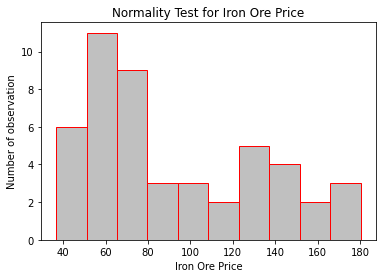

In [45]:
#Checking the normality for iron price
plt.hist(houses_4bed2bath_iron_combined["Average_IronOre_Price"],color='#C0C0C0', edgecolor='r')
print(st.normaltest(houses_4bed2bath_iron_combined["Average_IronOre_Price"]))
plt.savefig("Images/Normality_Iron.jpg")
#Plotting titles & axis
plt.xlabel("Iron Ore Price")
plt.ylabel("Number of observation")
plt.title("Normality Test for Iron Ore Price")

###### The noramlity test is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality. Ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html. Even though p value < 0.05 the graph shows it is not normally distributed as a bell shaped curve cannot be formed

NormaltestResult(statistic=7.794580131246836, pvalue=0.020296840090375034)


Text(0.5, 1.0, 'Normality Test for Perth House Prices')

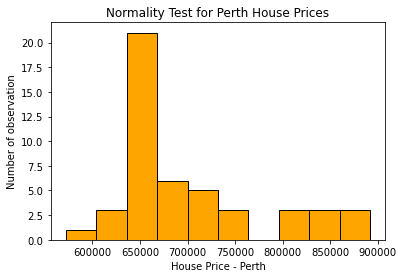

In [46]:
#Checking the normality for perth houses
plt.hist(houses_4bed2bath_iron_combined["Average_Houseprice_Perth"], color='orange', edgecolor='black')
print(st.normaltest(houses_4bed2bath_iron_combined["Average_Houseprice_Perth"]))
plt.savefig("Images/Normality_Perth.jpg")
#Plotting titles & axis
plt.xlabel("House Price - Perth")
plt.ylabel("Number of observation")
plt.title("Normality Test for Perth House Prices")

##### Even though p value < 0.05 the graph shows it is not normally distributed as a bell shaped curve cannot be formed 

### Perth T test result

In [38]:
st.ttest_ind(houses_4bed2bath_iron_combined["Average_IronOre_Price"],houses_4bed2bath_iron_combined["Average_Houseprice_Perth"],equal_var= False)

Ttest_indResult(statistic=-61.80523324314021, pvalue=1.1413352635208985e-46)

### Performing T test for Iron Prices vs Sydney House prices with 4 bedroom and 2 bathroom

* Checking the assumptions related to ttest

In [15]:
#calculating the standard deviation
population1= houses_4bed2bath_iron_combined["Average_IronOre_Price"].mean()
population2_perth= houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"].mean()

population1_std= np.std(houses_4bed2bath_iron_combined["Average_IronOre_Price"])
population2_perth_std= np.std(houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"])

population1_std, population2_perth_std

(41.058782670665856, 88642.33102201151)

NormaltestResult(statistic=4.527571489736997, pvalue=0.10395618726834033)


Text(0.5, 1.0, 'Normality Test for Sydney House Prices')

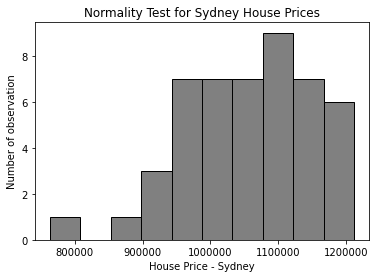

In [47]:
#Checking the normality for sydney houses
fig1, ax1 = plt.subplots(figsize=(6,4))
ax1.ticklabel_format(style='plain')
plt.hist(houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"],color='grey', edgecolor='black')
print(st.normaltest(houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"]))
plt.savefig("Images/Normality_Sydney.jpg")
#Plotting titles & axis
plt.xlabel("House Price - Sydney")
plt.ylabel("Number of observation")
plt.title("Normality Test for Sydney House Prices")

##### The p value> 0.05 and the graph shows it is not normally distributed as a bell shaped curve cannot be formed 

### Sydney T test result

In [39]:
st.ttest_ind(houses_4bed2bath_iron_combined["Average_IronOre_Price"],houses_4bed2bath_iron_combined["Average_Houseprice_Sydney"],equal_var= False)

Ttest_indResult(statistic=-77.20922054715528, pvalue=3.621593727234839e-51)